<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_vsPhasor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector vs Phasors</h1></b>

Dr. Bingsen Wang

7/20/2024
</center>

#Positive Sequence of Three-Phase Variables

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_a,v_b,v_c$ form a postive sequence if they have the same amplitude and frequency and different phase angles with $v_a$ leading $v_b$ by 120 degrees and $v_b$ leading $v_c$ by 120 degrees.
$$\begin{align}
v_a &= V\cos\left(\omega t+\theta \right)\\
v_b &= V\cos\left(\omega t+\theta - \frac{2\pi}{3} \right)\\
v_c &= V\cos\left(\omega t+\theta + \frac{2\pi}{3} \right)
\end{align}\tag{1}$$

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{2}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

##Space Vector of Positive-Sequence Variables

With reference to (1) and (2), the voltage space vector is
$$\begin{align}
\underline v &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= {2V\over3}\left[\cos\left(\omega t+\theta\right) + \cos\left(\omega t+\theta - \frac{2\pi}{3} \right)e^{j\frac{2\pi}{3}} + \cos\left(\omega t+\theta + \frac{2\pi}{3} \right)e^{j\frac{4\pi}{3}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v &= {2V\over3\times2}\begin{bmatrix}
e^{j\left(\omega t+\theta\right)} + e^{j\left(\omega t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{j\left(\omega t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}+\\
e^{-j\left(\omega t+\theta\right)} + e^{-j\left(\omega t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{-j\left(\omega t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}
\end{bmatrix}\\
&= Ve^{j(\omega t+\theta)}
\end{align}\tag{5}$$

#Phasors

Phasors take the amplitude and phase of the corresponding sinusoidal waveform in cosine function and form a complex variable. In power systems, the phasors use root-mean-square (RMS) value as the magnitude.

##Phasors Using Amplitudes

Using amplitudes, the phasors for the voltages in (1) are
$$\begin{align}
\hat V_a &= Ve^{j\theta}\\
\hat V_b &= Ve^{j\left(\theta-\frac{2\pi}{3}\right)}\\
\hat V_c &= Ve^{j\left(\theta+\frac{2\pi}{3}\right)}
\end{align}\tag{6}$$

##Phasors Using RMS Values

Using RMS values, the phasors for the voltages in (1) are
$$\begin{align}
\hat V_{a\_rms} &= \frac{V}{\sqrt{2}}e^{j\theta}\\
\hat V_{b\_rms} &= \frac{V}{\sqrt{2}}e^{j\left(\theta-\frac{2\pi}{3}\right)}\\
\hat V_{c\_rms} &= \frac{V}{\sqrt{2}}e^{j\left(\theta+\frac{2\pi}{3}\right)}
\end{align}\tag{7}$$

#Python Code
The Python code illustrates the space vector and phasors.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
0


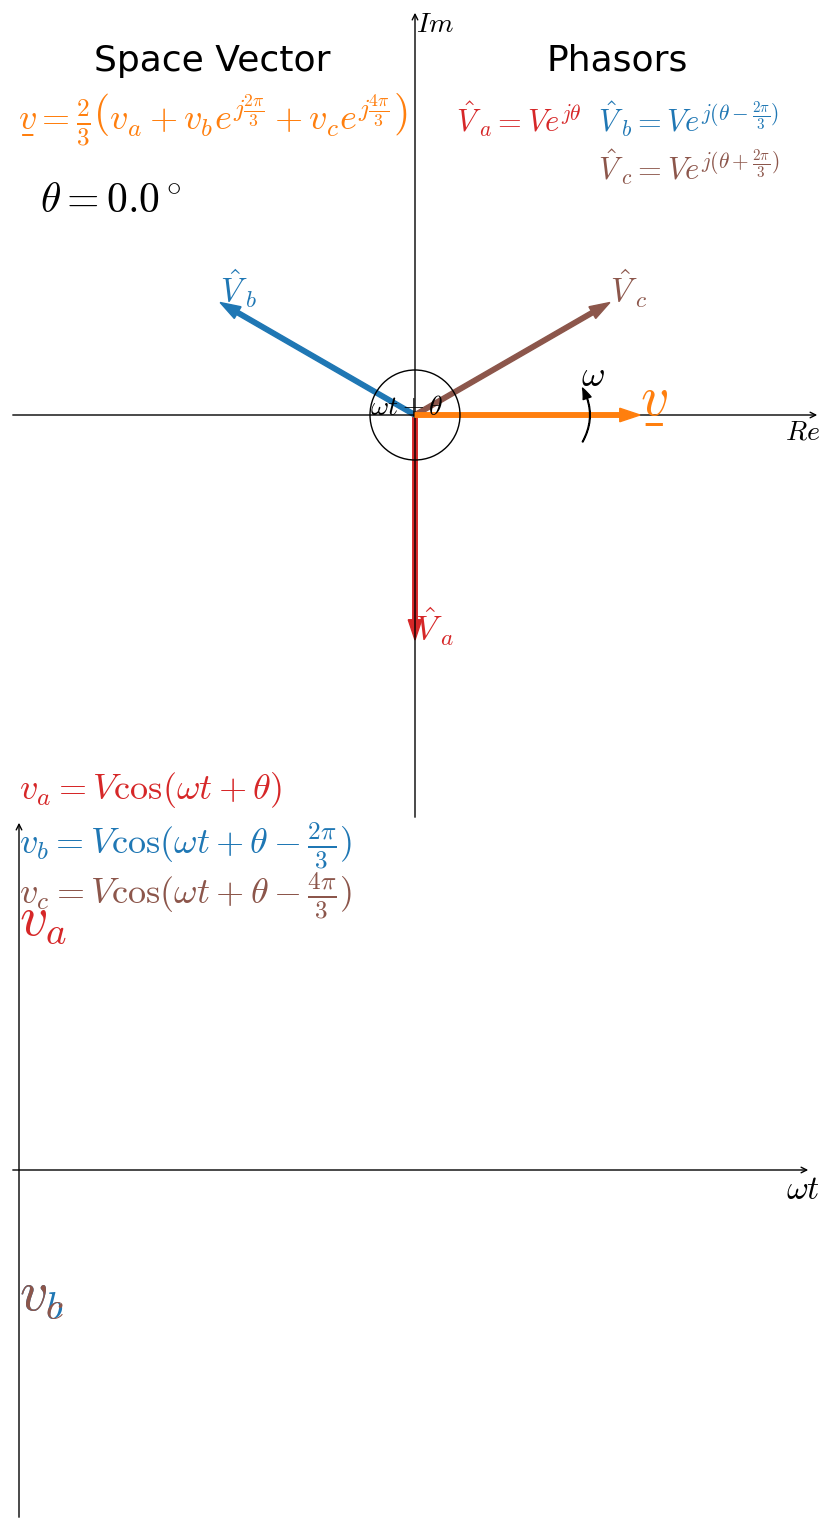

In [104]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def sv(abc):
  return (2/3)*(abc[0] + abc[1]*exp(1j*2*pi/3) + abc[2]*exp(1j*4*pi/3))
def vabc(V,w,t,theta):
  return np.array([V*cos(w*t+theta),V*cos(w*t+theta-2*pi/3),V*cos(w*t+theta+2*pi/3)])
def phasors(V,theta):
  return np.array([V*exp(1j*theta),V*exp(1j*(theta-2*pi/3)),V*exp(1j*(theta+2*pi/3))])

#parameters
Nfps = 200
f = 1 #frequency in Hz
t=linspace(0,1/f,Nfps)
V = 2.5 #voltage in V
theta_lst=[0,4*pi/6,7*pi/6,3*pi/2]

xymax = 4.5
clst=['tab:red','tab:blue','tab:brown','tab:green','tab:olive','tab:orange','k','w'] #colors light bg
vabc_eq=[r'$v_a=V\cos(\omega t+\theta)$',
           r'$v_b=V\cos(\omega t+\theta-\frac{2\pi}{3})$',
           r'$v_c=V\cos(\omega t+\theta-\frac{4\pi}{3})$']
vabc_labels = [r'$v_a$',r'$v_b$',r'$v_c$']
phasor_labels = [r'$\hat V_a$',r'$\hat V_b$',r'$\hat V_c$']
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->"}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->"}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->"}) #y-axis for voltages
ax.text(xymax,-.03,'$Re$',size=20,va='top',ha='right') #x-axis label
ax.text(0.01,xymax,'$Im$',size=20,va='top') #y label
ax1.text(2*xymax-.1,-.03,r'$\omega t$',size=24,va='top',ha='right') #x-axis label
ax.text(-xymax*.5,xymax*.85,'Space Vector',size=26,ha='center')
ax.text(-xymax*.5,xymax*.7,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=26,ha='center',color=clst[-3])
ax.text(xymax*.5,xymax*.85,'Phasors',size=26,ha='center')
ax.text(xymax*.1,xymax*.7,r'$\hat V_a = V e^{j\theta}$', size=22,ha='left',color=clst[0])
ax.text(xymax*.9,xymax*.7,r'$\hat V_b = V e^{j(\theta-\frac{2\pi}{3})}$', size=22,ha='right',color=clst[1])
ax.text(xymax*.9,xymax*.58,r'$\hat V_c = V e^{j(\theta+\frac{2\pi}{3})}$', size=22,ha='right',color=clst[2])
text_theta = ax.text(-xymax*.75,xymax*.5,'', size=30,color='k',ha='center')
lines, text_vabc, text_vabc_phasors, phasor_arrows = [],[],[],[]
lines.append(ax.plot([], [], '--', lw=2, color=clst[3])[0]) #v_sv trajectory
for i in range(3):
  lines.append(ax1.plot([], [], '-', lw=5, color=clst[i])[0]) #v_abc
  ax1.text(0,xymax*(8-i)/9,vabc_eq[i],size=26,va='top',color=clst[i]) #vabc equations
  text_vabc.append(ax1.text(0,0,vabc_labels[i],size=40,va='center',color=clst[i]))
  arr = mp.FancyArrow(0,0,phasors(V,theta_lst[0])[i].real, phasors(V,theta_lst[0])[i].imag,
                      width=.05,length_includes_head=True, color=clst[i])
  phasor_arrows.append(ax.add_patch(arr))
  text_vabc_phasors.append(ax.text(phasors(V,theta_lst[0])[i].real,phasors(V,theta_lst[0])[i].imag,phasor_labels[i],size=24,color=clst[i]))

def drawVectors(ax,xymax,v_sv,clst):
  theta = angle(v_sv) if angle(v_sv)>0 else angle(v_sv)+2*pi
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.05,length_includes_head=True,
                   color=clst[-3])
  ax.add_patch(arr)
  arc = mp.Arc((0,0),abs(v_sv)*.4,abs(v_sv)*.4,theta1=0,theta2=theta/pi*180)
  ax.add_patch(arc) # arc for wt+theta
  arc = mp.FancyArrowPatch((.75*(v_sv*exp(-1j*pi/18)).real,.75*(v_sv*exp(-1j*pi/18)).imag),
   (.75*(v_sv*exp(1j*pi/18)).real,.75*(v_sv*exp(1j*pi/18)).imag),connectionstyle="arc3,rad=.3",
    arrowstyle="Simple, tail_width=0.5, head_width=6, head_length=8",color='k')
  ax.add_patch(arc) # arc for omega
  ax.text(.75*(v_sv*exp(1j*pi/18)).real,.75*(v_sv*exp(1j*pi/18)).imag,
          r'$\omega$', size = 26,color='k') #omega marking
  ax.text(abs(v_sv)*.2*cos(0.5*theta),abs(v_sv)*.2*sin(.5*theta),
          r'$\omega t+\theta$', size = 20,color='k') #angle marking
  hapos = 'left' if theta<pi/2 or theta>3*pi/2 else 'right'
  ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40,color=clst[-3],ha=hapos)
  return

# animation function. This is called sequentially
def animate(i):
  # i=Nfps
  if i%30==0: print(i) #for monitoring the progress
  theta=theta_lst[int(i/Nfps)]
  text_theta.set_text(r'$\theta={:.1f}^\circ$'.format(theta*180/pi))
  vabc_ser = vabc(V,2*pi*f,t,theta)
  if i%Nfps==0 and int(i/Nfps)>0: #redrawn pahsor if theta changes
    for k in range(3):
      phasor_arrows[k].remove()
      arr = mp.FancyArrow(0,0,phasors(V,theta_lst[int(i/Nfps)])[k].real, phasors(V,theta_lst[int(i/Nfps)])[k].imag,
                      width=.05,length_includes_head=True, color=clst[k])
      phasor_arrows[k]=ax.add_patch(arr)
      text_vabc_phasors[k].set_position((phasors(V,theta_lst[int(i/Nfps)])[k].real,phasors(V,theta_lst[int(i/Nfps)])[k].imag))
  i=i%Nfps
  lines[0].set_data(sv(vabc_ser[:,:i+1]).real,sv(vabc_ser[:,:i+1]).imag) #v_sv trajectory
  for k in range(3):
    lines[k+1].set_data(t[:i+1]*f*xymax*1.9,vabc_ser[k,:i+1]) #v_abc
    text_vabc[k].set_position((t[i]*f*xymax*1.9,vabc_ser[k,i])) #v_abc lables
  drawVectors(ax0,xymax,sv(vabc_ser[:,i]),clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*len(theta_lst), interval=50)
fn = r"SpaceVector_vsPhasors.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)